In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt


df = pd.read_csv('ds_salaries.csv')
temporada = df[['year', 'season starting']].groupby('year').mean()
temporada = temporada['season starting'].tolist()
conteo = df[['year', 'count']].groupby('year').mean()
conteo = conteo['count'].tolist()
longitud = df[['year', 'Longitude EPSG:4326']].groupby('year').mean()
longitud = longitud['Longitude EPSG:4326'].tolist()
latitud = df[['year', 'Latitude EPSG:4326']].groupby('year').mean()
latitud = latitud['Latitude EPSG:4326'].tolist()
nidos = df[['year', 'accuracy']].groupby('year').mean()
nidos = nidos['accuracy'].tolist()
df


def calcular_error(valores_reales, pronostico):
    pronostico_cortado = pronostico[:-1]
    resultado = 0
    for i in range(len(pronostico_cortado)):
        resultado += abs(valores_reales[i+len(valores_reales)-len(pronostico)] - pronostico_cortado[i])
    divisor = len(pronostico_cortado)
    resultado /= divisor
    return resultado

def suavizado(data):
    alfa = 0.5
    suavizado = []
    for i in range(len(data)):
        if i == 0:
            suavizado.append(data[i])
        else:
            suavizado.append(alfa * data[i] + (1 - alfa) * suavizado[i-1])
    return suavizado

def movil(data):
    forecast = []
    n = 3
    for i in range(len(data) - n + 1):
        suma = sum(data[i:i+n])
        mean = suma / n
        forecast.append(mean)
    return forecast

def movilPonderado(data):
    forecast = []
    n = 3
    weights = [(i+1) for i in range(n)]
    for i in range(len(data) - n + 1):
        window = data[i:i+n]
        weighted_sum = sum([window[j] * weights[j] for j in range(n)])
        mean = weighted_sum / sum(weights)
        forecast.append(mean)
    return forecast

def exponencialTendencia(data):
    alfa = 0.5
    beta = 0.6
    suavizado = [data[0]]
    tendencia = [0]
    valor = [suavizado[0]]
    for i in range(1, len(data)):
        suavizado_i = alfa * data[i] + (1 - alfa) * (suavizado[i-1] + tendencia[i-1])
        tendencia_i = beta * (suavizado_i - suavizado[i-1]) + (1 - beta) * tendencia[i-1]
        valor_i = suavizado_i + tendencia_i
        suavizado.append(suavizado_i)
        tendencia.append(tendencia_i)
        valor.append(valor_i)
    return valor


def cuadrados1(data):
    n = len(data)
    x = np.arange(n)
    X = np.vstack([x, np.ones(n)]).T
    m, b = np.linalg.lstsq(X, data, rcond=None)[0]
    proyeccion = []
    for t in range(n, n+2):
        proyeccion.append(m*t + b)

    return proyeccion

def cuadrados2(data):
    n = len(data)
    x = np.arange(n)
    X = np.vstack([x, np.ones(n)]).T
    m, b = np.linalg.lstsq(X, data, rcond=None)[0]
    proyeccion = []
    for t in range(n, n+2):
        proyeccion.append(m*t + b)

    return proyeccion

def cuadrados3(data):
    n = len(data)
    x = np.arange(n)
    X = np.vstack([x, np.ones(n)]).T
    m, b = np.linalg.lstsq(X, data, rcond=None)[0]
    proyeccion = []
    for t in range(n, n+2):
        proyeccion.append(m*t + b)

    return proyeccion

def cuadrados4(data):
    n = len(data)
    x = np.arange(n)
    X = np.vstack([x, np.ones(n)]).T
    m, b = np.linalg.lstsq(X, data, rcond=None)[0]
    proyeccion = []
    for t in range(n, n+2):
        proyeccion.append(m*t + b)

    return proyeccion

def cuadrados5(data):
    n = len(data)
    x = np.arange(n)
    X = np.vstack([x, np.ones(n)]).T
    m, b = np.linalg.lstsq(X, data, rcond=None)[0]
    proyeccion = []
    for t in range(n, n+2):
        proyeccion.append(m*t + b)

    return proyeccion


In [2]:
df

,site name,site id,ccamlr region,Longitude EPSG:4326,Latitude EPSG:4326,common name,day,month,year,season starting,count,accuracy,count type,vantage,reference,notes
0,Neko Harbor (Andvord Bay),NEKO,48.1,-62.5327,-64.8383,gentoo penguin,4,2,1987,1986,397,1,chicks,ground,"<strong>Poncet, S. and J. Poncet, </strong><i>...",None
1,Neko Harbor (Andvord Bay),NEKO,48.1,-62.5327,-64.8383,gentoo penguin,3,2,1996,1995,934,1,chicks,ground,"<strong>Lynch, H. J., R. Naveen, and P. Casano...",None
2,Neko Harbor (Andvord Bay),NEKO,48.1,-62.5327,-64.8383,gentoo penguin,23,1,1999,1998,625,1,chicks,ground,"<strong>Lynch, H. J., R. Naveen, and P. Casano...",None
3,Neko Harbor (Andvord Bay),NEKO,48.1,-62.5327,-64.8383,gentoo penguin,24,1,2000,1999,1320,1,chicks,ground,"<strong>Lynch, H. J., R. Naveen, and P. Casano...",None
4,Neko Harbor (Andvord Bay),NEKO,48.1,-62.5327,-64.8383,gentoo penguin,16,12,1999,1999,864,1,nests,ground,"<strong>Lynch, H. J., R. Naveen, and P. Casano...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Petermann Island,PETE,48.1,-64.1370,-65.1760,gentoo penguin,27,1,2015,2014,3905,1,chicks,ground,"<strong>Lynch, H. J., </strong><i> ????a</i>. ...",None
196,Petermann Island,PETE,48.1,-64.1370,-65.1760,adelie penguin,25,1,2016,2015,363,1,chicks,ground,"<strong>Lynch, H. J., </strong><i> ????a</i>. ...",None
197,Petermann Island,PETE,48.1,-64.1370,-65.1760,adelie penguin,5,1,2018,2017,238,1,nests,ground,"<strong>Lynch, H. J., </strong><i> ????a</i>. ...",None
198,Petermann Island,PETE,48.1,-64.1370,-65.1760,adelie penguin,26,1,2018,2017,292,1,chicks,ground,"<strong>Lynch, H. J., </strong><i> ????a</i>. ...",None


El pronostico para el siguiente periodo usando promedio movil:  2017.047619047619
El error del módelo es:  1.217687074829923
--------------------------------------------------------------------------------
El pronostico para el siguiente periodo usando promedio movil ponderado:  2017.3809523809523
El error del módelo es:  0.8120748299319384
--------------------------------------------------------------------------------
El pronostico para el siguiente periodo usando suavizado exponencial simple:  2017.0910191646435
El error del módelo es:  1.1394012776429387
--------------------------------------------------------------------------------
El pronostico para el siguiente periodo usando suavizado exponencial con tendencia:  2018.9381860648484
El error del módelo es:  1.1354805587654786
--------------------------------------------------------------------------------
El pronostico para el siguiente periodo usando minimos cuadrados 2021.5661579577668
El error del módelo es:  3.32116043399196

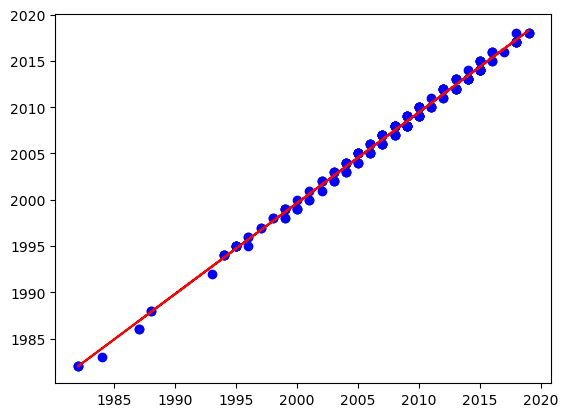

In [3]:
movilL = movil(temporada)
movilPonderadoL = movilPonderado(temporada)
suavizadoL = suavizado(temporada)
exponencialTendenciaL = exponencialTendencia(temporada)
cuadrados2 = cuadrados2(temporada)
print("El pronostico para el siguiente periodo usando promedio movil: ", movilL[-1])
print("El error del módelo es: ", calcular_error(temporada, movilL))
print("--------------------------------------------------------------------------------")
        
print("El pronostico para el siguiente periodo usando promedio movil ponderado: ", movilPonderadoL[-1])
print("El error del módelo es: ", calcular_error(temporada, movilPonderadoL))
print("--------------------------------------------------------------------------------")
        
print("El pronostico para el siguiente periodo usando suavizado exponencial simple: ", suavizadoL[-1])
print("El error del módelo es: ", calcular_error(temporada, suavizadoL))
print("--------------------------------------------------------------------------------")
        
print("El pronostico para el siguiente periodo usando suavizado exponencial con tendencia: ", exponencialTendenciaL[-1])
print("El error del módelo es: ", calcular_error(temporada, exponencialTendenciaL))
print("--------------------------------------------------------------------------------")

print("El pronostico para el siguiente periodo usando minimos cuadrados", cuadrados2[-1])
print("El error del módelo es: ", calcular_error(temporada, cuadrados2))
print("--------------------------------------------------------------------------------")
print("El mejor pronostico corresponde al de promedio movil ponderado, ya que contiene el menor error")

x = df["year"].values
y = df["season starting"].values

# Ajuste una regresión lineal a los datos
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)

# Trace el gráfico de dispersión y la línea de tendencia
plt.plot(x, y, 'o', color="blue")
plt.plot(x, poly1d_fn(x), color='red')

# Muestre el gráfico
plt.show()

El pronostico para el siguiente periodo usando promedio movil: 973.4761904761905
El error del módelo es:  147.74994768180858
--------------------------------------------------------------------------------
El pronostico para el siguiente periodo usando promedio movil ponderado: 911.8095238095239
El error del módelo es:  112.02804052150857
--------------------------------------------------------------------------------
El pronostico para el siguiente periodo usando suavizado exponencial simple: 897.7382244174778
El error del módelo es:  97.46898810865659
--------------------------------------------------------------------------------
El pronostico para el siguiente periodo usando suavizado exponencial con tendencia: 836.6086517280567
El error del módelo es:  97.6865529183075
--------------------------------------------------------------------------------
El pronostico para el siguiente periodo usando minimos cuadrados: 1081.1107544842675
El error del módelo es:  121.99294623882008
-----

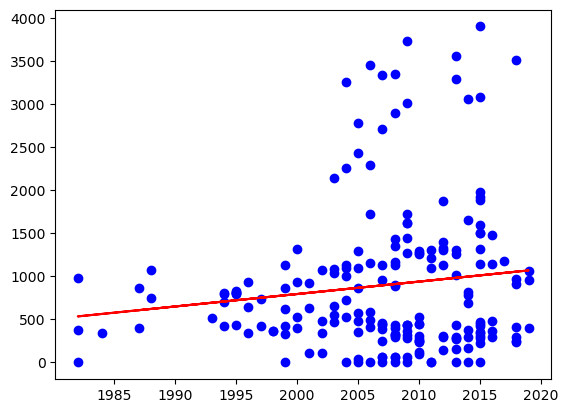

In [4]:
movilL = movil(conteo)
movilPonderadoL = movilPonderado(conteo)
suavizadoL = suavizado(conteo)
exponencialTendenciaL = exponencialTendencia(conteo)
cuadrados3 = cuadrados3(conteo)

print("El pronostico para el siguiente periodo usando promedio movil:", movilL[-1])
print("El error del módelo es: ", calcular_error(conteo, movilL))
print("--------------------------------------------------------------------------------")
        
print("El pronostico para el siguiente periodo usando promedio movil ponderado:", movilPonderadoL[-1])
print("El error del módelo es: ", calcular_error(conteo, movilPonderadoL))
print("--------------------------------------------------------------------------------")
        
print("El pronostico para el siguiente periodo usando suavizado exponencial simple:", suavizadoL[-1])
print("El error del módelo es: ", calcular_error(conteo, suavizadoL))
print("--------------------------------------------------------------------------------")
        
print("El pronostico para el siguiente periodo usando suavizado exponencial con tendencia:", exponencialTendenciaL[-1])
print("El error del módelo es: ", calcular_error(conteo, exponencialTendenciaL))
print("--------------------------------------------------------------------------------")

print("El pronostico para el siguiente periodo usando minimos cuadrados:", cuadrados3[-1])
print("El error del módelo es: ", calcular_error(conteo, cuadrados3))
print("--------------------------------------------------------------------------------")
print("El mejor pronostico corresponde al de suavizado exponencial simple, ya que contiene el menor error")

x = df["year"].values
y = df["count"].values

# Ajuste una regresión lineal a los datos
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)

# Trace el gráfico de dispersión y la línea de tendencia
plt.plot(x, y, 'o', color="blue")
plt.plot(x, poly1d_fn(x), color='red')

# Muestre el gráfico
plt.show()

El pronostico para el siguiente periodo usando promedio movil
El error del módelo es:  0.0733546113293804
--------------------------------------------------------------------------------
El pronostico para el siguiente periodo usando promedio movil ponderado
El error del módelo es:  0.05549263158293576
--------------------------------------------------------------------------------
El pronostico para el siguiente periodo usando suavizado exponencial simple
El error del módelo es:  0.05624396934895989
--------------------------------------------------------------------------------
El pronostico para el siguiente periodo usando suavizado exponencial con tendencia
El error del módelo es:  0.06301027289480837
--------------------------------------------------------------------------------
El pronostico para el siguiente periodo usando minimos cuadrados
El error del módelo es:  0.032401094318132095
--------------------------------------------------------------------------------
El mejor pro

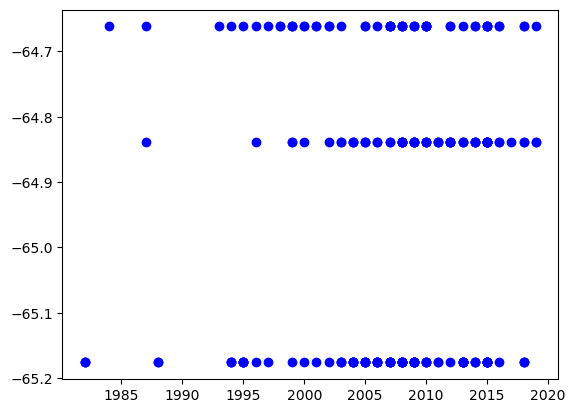

In [5]:
movilL = movil(latitud)
movilPonderadoL = movilPonderado(latitud)
suavizadoL = suavizado(latitud)
exponencialTendenciaL = exponencialTendencia(latitud)
cuadrados4 = cuadrados4(latitud)

print("El pronostico para el siguiente periodo usando promedio movil")
print("El error del módelo es: ", calcular_error(latitud, movilL))
print("--------------------------------------------------------------------------------")
        
print("El pronostico para el siguiente periodo usando promedio movil ponderado")
print("El error del módelo es: ", calcular_error(latitud, movilPonderadoL))
print("--------------------------------------------------------------------------------")
        
print("El pronostico para el siguiente periodo usando suavizado exponencial simple")
print("El error del módelo es: ", calcular_error(latitud, suavizadoL))
print("--------------------------------------------------------------------------------")
        
print("El pronostico para el siguiente periodo usando suavizado exponencial con tendencia")
print("El error del módelo es: ", calcular_error(latitud, exponencialTendenciaL))
print("--------------------------------------------------------------------------------")

print("El pronostico para el siguiente periodo usando minimos cuadrados")
print("El error del módelo es: ", calcular_error(latitud, cuadrados4))
print("--------------------------------------------------------------------------------")
print("El mejor pronostico corresponde al de minimos cuadrados, ya que contiene el menor error")


        
x = df["year"].values
y = df["Latitude EPSG:4326"].values
plt.plot(x,y, "o", color="blue")
plt.show()

El pronostico para el siguiente periodo usando promedio movil: 1.0952380952380951
El error del módelo es:  0.09984301412872841
--------------------------------------------------------------------------------
El pronostico para el siguiente periodo usando promedio movil ponderado: 1.0952380952380951
El error del módelo es:  0.0748822605965463
--------------------------------------------------------------------------------
El pronostico para el siguiente periodo usando suavizado exponencial simple 1.0715956104509943
El error del módelo es:  0.1276013831260713
--------------------------------------------------------------------------------
El pronostico para el siguiente periodo usando suavizado exponencial con tendencia 1.1337251131186912
El error del módelo es:  0.20150331115555964
--------------------------------------------------------------------------------
El pronostico para el siguiente periodo usando minimos cuadrados: 0.7333496543778796
El error del módelo es:  0.524127968805388

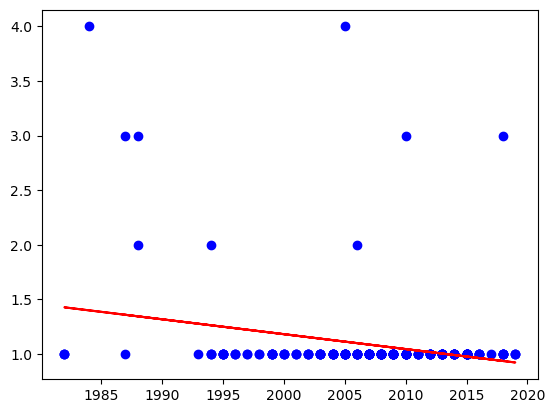

In [6]:
movilL = movil(nidos)
movilPonderadoL = movilPonderado(nidos)
suavizadoL = suavizado(nidos)
exponencialTendenciaL = exponencialTendencia(nidos)
cuadrados5 = cuadrados5(nidos)
print("El pronostico para el siguiente periodo usando promedio movil:", movilL[-1])
print("El error del módelo es: ", calcular_error(nidos, movilL))
print("--------------------------------------------------------------------------------")

        
print("El pronostico para el siguiente periodo usando promedio movil ponderado:", movilPonderadoL[-1])
print("El error del módelo es: ", calcular_error(nidos, movilPonderadoL))
print("--------------------------------------------------------------------------------")

print("El pronostico para el siguiente periodo usando suavizado exponencial simple", suavizadoL[-1])
print("El error del módelo es: ", calcular_error(nidos, suavizadoL))
print("--------------------------------------------------------------------------------")
        
print("El pronostico para el siguiente periodo usando suavizado exponencial con tendencia", exponencialTendenciaL[-1])
print("El error del módelo es: ", calcular_error(nidos, exponencialTendenciaL))
print("--------------------------------------------------------------------------------")

print("El pronostico para el siguiente periodo usando minimos cuadrados:", cuadrados5[-1])
print("El error del módelo es: ", calcular_error(nidos, cuadrados5))
print("--------------------------------------------------------------------------------")
print("El mejor pronostico corresponde al de promedio movil ponderado, ya que contiene el menor error")
        
x = df["year"].values
y = df["accuracy"].values

# Ajuste una regresión lineal a los datos
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)

# Trace el gráfico de dispersión y la línea de tendencia
plt.plot(x, y, 'o', color="blue")
plt.plot(x, poly1d_fn(x), color='red')

# Muestre el gráfico
plt.show()

El pronostico para el siguiente periodo usando minimos cuadrados es:  -62.965036150723954
El error del módelo es:  0.2821560727377417
--------------------------------------------------------------------------------
El pronostico para el siguiente periodo usando promedio movil: -62.79083650793651
El error del módelo es:  0.23972354990480937
--------------------------------------------------------------------------------
El pronostico para el siguiente periodo usando promedio movil ponderado: -62.79863095238096
El error del módelo es:  0.18210378278700798
--------------------------------------------------------------------------------
El pronostico para el siguiente periodo usando suavizado exponencial simple: -62.801326198615726
El error del módelo es:  0.18395832119034167
--------------------------------------------------------------------------------
El pronostico para el siguiente periodo usando suavizado exponencial con tendencia -62.65182532882439
El error del módelo es:  0.1864209

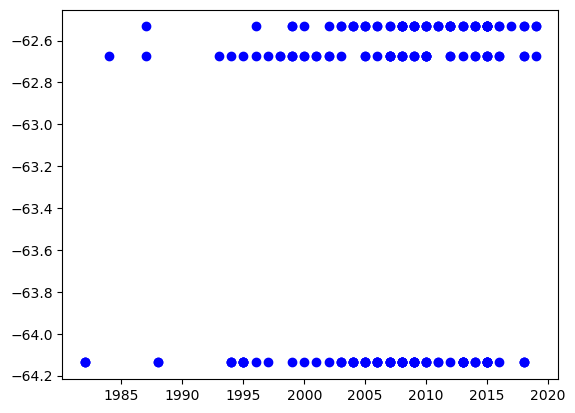

In [7]:
movilL = movil(longitud)
movilPonderadoL = movilPonderado(longitud)
suavizadoL = suavizado(longitud)
exponencialTendenciaL = exponencialTendencia(longitud)
cuadrados1 = cuadrados1(longitud)   

print("El pronostico para el siguiente periodo usando minimos cuadrados es: ", cuadrados1[-1])
print("El error del módelo es: ", calcular_error(longitud, cuadrados1))
print("--------------------------------------------------------------------------------")

print("El pronostico para el siguiente periodo usando promedio movil:", movilL[-1])
print("El error del módelo es: ", calcular_error(longitud, movilL))
print("--------------------------------------------------------------------------------")

print("El pronostico para el siguiente periodo usando promedio movil ponderado:", movilPonderadoL[-1])
print("El error del módelo es: ", calcular_error(longitud, movilPonderadoL))
print("--------------------------------------------------------------------------------")

print("El pronostico para el siguiente periodo usando suavizado exponencial simple:", suavizadoL[-1])
print("El error del módelo es: ", calcular_error(longitud, suavizadoL))
print("--------------------------------------------------------------------------------")

print("El pronostico para el siguiente periodo usando suavizado exponencial con tendencia", exponencialTendenciaL[-1])
print("El error del módelo es: ", calcular_error(longitud, exponencialTendenciaL))
print("--------------------------------------------------------------------------------")
print("El mejor pronostico corresponde al de promedio movil ponderado, ya que contiene el menor error")



x = df["year"].values
y = df["Longitude EPSG:4326"].values
plt.plot(x,y, "o", color="blue")
plt.show()

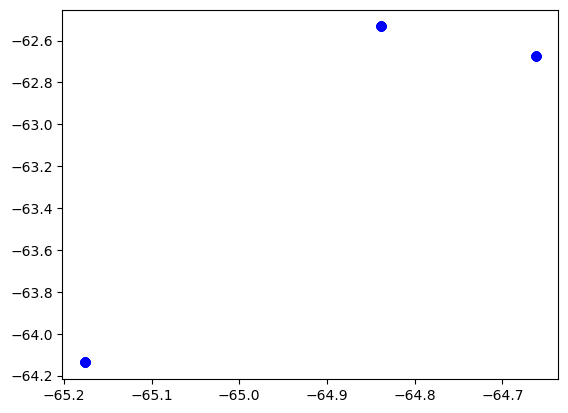

In [8]:
x = df["Latitude EPSG:4326"].values
y = df["Longitude EPSG:4326"].values
plt.plot(x,y, "o", color="blue")
plt.show()